# Hometask New Yorker

### 1. Association Analysis Reporting using the Apriori algorithm

Task: Build a report, using the Instacart Dataset, showing which items are often - or rarely - being sold together. 

The task of finding out products that are likely to be purchased together is known as market basket analysis. To perform market basket analysis on the instacart dataset, I'll be using the Apriori algorithm, which is the classic algorithm employed for association analysis on large datasets. 

The Apriori algorithm provides metrics allowing to evaluate association rules. The __confidence__ of a rule $A\rightarrow C$ is the probability of seeing the article $C$ (consequent) in a transaction given that it also contains the article $A$ (antecedent). The __support__ of the rule $A\rightarrow C$ indicates how frequently the itemset $A\bigcap C$ appears in the dataset. The __lift__, measures how much more often the antecedent and consequent of a rule $A\bigcap C$ occur together than we would expect if they were statistically independent. A high lift value indicates that the association rule is more significant, as it suggests that the two items are highly dependent on each other.

In [ ]:
import gc 
 gc.collect()
 %reset -f

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.cluster import KMeans
from tabulate import tabulate

Import data

In [3]:
order_prod = pd.read_csv('instacart-market-basket-analysis\\order_products__prior.csv\\order_products__prior.csv')
prod = pd.read_csv('instacart-market-basket-analysis\\products.csv\\products.csv')

Join data

In [7]:
df_data = pd.merge(order_prod,prod,how='inner',on='product_id')

Consider only the first 30.000 orders in order to limit memory expenditures

In [8]:
df_data = df_data[df_data['order_id']<30000]

Prepare the data for the Apriori algorithm

In [9]:
df_apriori = df_data[['order_id','product_name']].copy()
df_apriori.rename(columns={'order_id':'order','product_name':'items'},inplace=True)
df_apriori['temp']=True
df = df_apriori.groupby(['order','items'])['temp'].any().unstack().fillna(False)

Run the Apriori algorithm. Note that we're considering only rules which support is higher than a certain threshold (they are backed by enough data), and with positive lift (they are significant). We then order the results by decreasing confidence, the rules with the highest confidence (all things being equal) being the most "powerful" ones.

In [10]:
apriori_out = apriori(df,min_support=0.01,use_colnames=True)

Extract the association rules

In [11]:
rules = association_rules(apriori_out,metric='lift',min_threshold=1)
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,Organic Fuji Apple,Banana,0.027887,0.148874,0.010502,0.376590,2.529599,0.006350,1.365276,0.622027
9,Cucumber Kirby,Banana,0.031080,0.148874,0.010467,0.336758,2.262041,0.005840,1.283282,0.575818
5,Organic Raspberries,Bag of Organic Bananas,0.043463,0.119993,0.013305,0.306122,2.551171,0.008090,1.268246,0.635650
13,Organic Avocado,Banana,0.054674,0.148874,0.016498,0.301752,2.026903,0.008359,1.218946,0.535939
3,Organic Hass Avocado,Bag of Organic Bananas,0.066844,0.119993,0.018946,0.283439,2.362135,0.010925,1.228099,0.617961
22,Strawberries,Banana,0.045343,0.148874,0.012844,0.283255,1.902656,0.006093,1.187489,0.496952
11,Large Lemon,Banana,0.046159,0.148874,0.012099,0.262106,1.760596,0.005227,1.153454,0.452917
7,Organic Strawberries,Bag of Organic Bananas,0.079688,0.119993,0.018627,0.233749,1.948023,0.009065,1.148458,0.528798
15,Organic Baby Spinach,Banana,0.075111,0.148874,0.016463,0.219178,1.472244,0.005281,1.090039,0.346814
21,Organic Strawberries,Banana,0.079688,0.148874,0.017456,0.219056,1.471424,0.005593,1.089869,0.348128


Next we want to display the results in a visual way. To this end, I'll build a heatmap displaying the "strength" (confidence) of the selected association rules.

Put the rules in the adequate shape:

In [12]:
apriori_rules = rules.pivot(index="antecedents", columns="consequents", values="confidence")

Create the association rules heatmap displaying the confidence for each rule

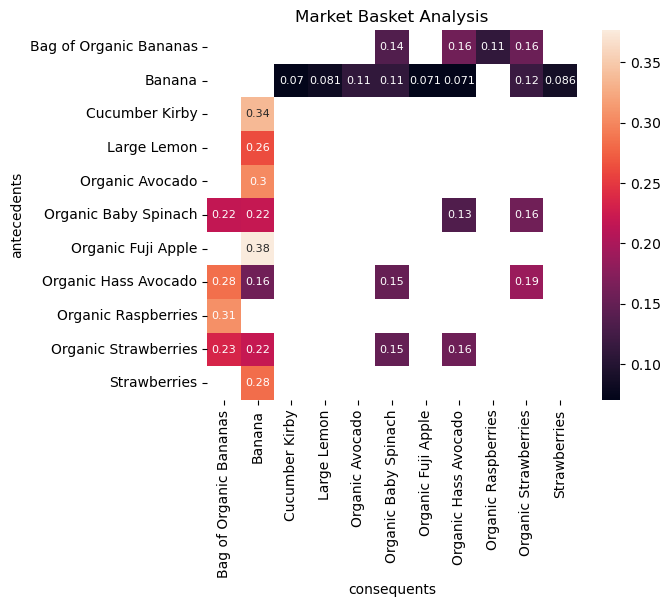

In [13]:
ax = sns.heatmap(apriori_rules, annot=True, square=True,annot_kws={'size': 8})
plt.title("Market Basket Analysis")
plt.show()

### 2. Free Analysis: Customer Segmentation using k-means clustering

Next I'm going to try and create clusters of users according to the aisles they have been purchasing articles from. Finally for each such user cluster I'll display the 10 aisles each clustered users have been purchasing from the most, in order to give an idea of the consumer profile associated with each cluster. These profiles might then be used for  

In [14]:
orders = pd.read_csv('instacart-market-basket-analysis\\orders.csv\\orders.csv')
order_train = pd.read_csv('instacart-market-basket-analysis\\order_products__train.csv\\order_products__train.csv')
aisles = pd.read_csv('instacart-market-basket-analysis\\aisles.csv\\aisles.csv')
departments = pd.read_csv('instacart-market-basket-analysis\\departments.csv\\departments.csv')

Sample data and join data

In [170]:
prior = order_prod [:500000] # limit the size of the considered data to spare memory
prior_orders = pd.merge(prior, orders, on= 'order_id')
prod_aisles = pd.merge(prod, aisles, on = 'aisle_id')
prod_aisles_dep = pd.merge(prod_aisles, departments, on = 'department_id')
df_comb_data = pd.merge(prior_orders, prod_aisles_dep, on = 'product_id').reset_index(drop=True)
df_users_aisles = pd.crosstab(df_comb_data['user_id'], df_comb_data['aisle'])

Next I'll look into the number of clusters we want to create, using the quick and dirty elbow heuristic

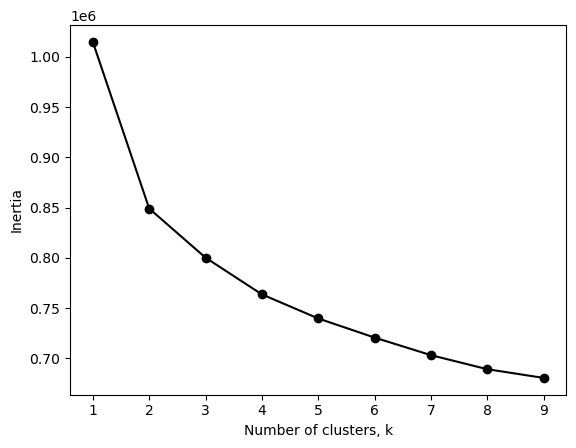

In [21]:
X = df_users_aisles.values
ks = range(1,10) 
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)    
    model.fit(X)                   
    inertias.append(model.inertia_) 
    
plt.plot(ks, inertias, '-o', color='black') 
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

The curve more or less follows a straight line after x=4, so let's build 4 clusters.

Let's reduce the dimensionality of our data using principal component analysis. We select the hyperparameter so as to keep 85% of the variance in the original data after applying PCA.

In [137]:
pca = decomposition.PCA(n_components=0.85)
pca_users_orders = pca.fit_transform(X)

Now I'll build the 4 clusters with the help of the KMeans algorithm.

In [142]:
PCA_components = pd.DataFrame(pca_users_orders)
kmeans = KMeans(n_clusters=4)
X_clustered = kmeans.fit_predict(pca_users_orders) 

Mapping clusters to users.

In [143]:
df_users_aisles['cluster']=X_clustered

Let's have a look at the cluster concentration

In [144]:
df_users_aisles['cluster'].value_counts().sort_values(ascending = False)

cluster
0    26037
1     6948
3     5511
2     1338
Name: count, dtype: int64

Now we display the top 10 pruchased-from aisles per cluster, in order to get an idea of each cluster profile.

In [163]:
a = df_users_aisles[df_users_aisles.cluster==0].sum().nlargest(100)
sum = list(a)
values = list(a.index)
Series_Dict = {"Cluster 0 Aisle":values, "Nr Orders 0":sum}
data_0 = pd.DataFrame(Series_Dict)
a = df_users_aisles[df_users_aisles.cluster==1].sum().nlargest(100)
sum = list(a)
values = list(a.index)
Series_Dict = {"Cluster 1 Aisle":values, "Nr Orders 1":sum}
data_1 = pd.DataFrame(Series_Dict)
a = df_users_aisles[df_users_aisles.cluster==2].sum().nlargest(100)
sum = list(a)
values = list(a.index)
Series_Dict = {"Cluster 2 Aisle":values, "Nr Orders 2":sum}
data_2 = pd.DataFrame(Series_Dict)
a = df_users_aisles[df_users_aisles.cluster==3].sum().nlargest(100)
sum = list(a)
values = list(a.index)
Series_Dict = {"Cluster 3 Aisle":values, "Nr Orders 3":sum}
data_3 = pd.DataFrame(Series_Dict)
df_sums = pd.concat([data_0,data_1,data_2,data_3],
axis=1)
df_sums.head(15)

,Cluster 0 Aisle,Nr Orders 0,Cluster 1 Aisle,Nr Orders 1,Cluster 2 Aisle,Nr Orders 2,Cluster 3 Aisle,Nr Orders 3
0,fresh fruits,14050,fresh fruits,24053,fresh vegetables,10441,fresh vegetables,23717
1,fresh vegetables,9988,yogurt,9741,fresh fruits,8954,cluster,16533
2,packaged vegetables fruits,8937,packaged vegetables fruits,8500,packaged vegetables fruits,3854,fresh fruits,9269
3,yogurt,7407,fresh vegetables,7927,cluster,2676,packaged vegetables fruits,6056
4,water seltzer sparkling water,7307,cluster,6948,yogurt,2436,yogurt,2901
5,milk,6154,packaged cheese,4371,packaged cheese,1729,packaged cheese,2779
6,packaged cheese,6081,milk,4266,milk,1361,fresh herbs,2132
7,chips pretzels,5407,chips pretzels,3302,soy lactosefree,1044,milk,1934
8,ice cream ice,4346,water seltzer sparkling water,3107,fresh herbs,1006,soy lactosefree,1838
9,soy lactosefree,4315,soy lactosefree,2859,frozen produce,982,frozen produce,1697


On the whole, at this level the 4 clusters seem to be quite similar, with the exception of the high prevalence of ice cream and frozen meals in the Cluster 0, which might indicate that the cluster contains more convenience seekers, and the prevalence of baby food in the clusters 1 and 2. Nonetheless, the segmentation proposed here doesn't seem to allow us to identify clear patterns. Considering the results in terms of the percentage of the number of orders to the orders total of the 100 most ordered from aisles doesn't substantially change this picture.

In [169]:
df_sums['Nr_orders_ratio_0'] = (df_sums['Nr Orders 0'] / df_sums['Nr Orders 0'].sum()) * 100
df_sums['Nr_orders_ratio_1'] = (df_sums['Nr Orders 1'] / df_sums['Nr Orders 1'].sum()) * 100
df_sums['Nr_orders_ratio_2'] = (df_sums['Nr Orders 2'] / df_sums['Nr Orders 2'].sum()) * 100
df_sums['Nr_orders_ratio_3'] = (df_sums['Nr Orders 3'] / df_sums['Nr Orders 3'].sum()) * 100
pd.concat([df_sums.nlargest(15,'Nr_orders_ratio_0')[['Cluster 0 Aisle','Nr_orders_ratio_0']],
            df_sums.nlargest(15,'Nr_orders_ratio_1')[['Cluster 1 Aisle','Nr_orders_ratio_1']],
            df_sums.nlargest(15,'Nr_orders_ratio_2')[['Cluster 0 Aisle','Nr_orders_ratio_2']],
            df_sums.nlargest(15,'Nr_orders_ratio_3')[['Cluster 0 Aisle','Nr_orders_ratio_3']]],
axis=1)

,Cluster 0 Aisle,Nr_orders_ratio_0,Cluster 1 Aisle,Nr_orders_ratio_1,Cluster 0 Aisle,Nr_orders_ratio_2,Cluster 0 Aisle,Nr_orders_ratio_3
0,fresh fruits,7.085367,fresh fruits,16.509599,fresh fruits,17.535816,fresh fruits,20.793624
1,fresh vegetables,5.036915,yogurt,6.686068,fresh vegetables,15.038377,fresh vegetables,14.495130
2,packaged vegetables fruits,4.506899,packaged vegetables fruits,5.834266,packaged vegetables fruits,6.472851,packaged vegetables fruits,8.126496
3,yogurt,3.735325,fresh vegetables,5.440968,yogurt,4.494382,yogurt,5.309533
4,water seltzer sparkling water,3.684895,cluster,4.768997,water seltzer sparkling water,4.091298,water seltzer sparkling water,2.543421
5,milk,3.103441,packaged cheese,3.000185,milk,2.903881,milk,2.436458
6,packaged cheese,3.066628,milk,2.928115,packaged cheese,2.285820,packaged cheese,1.869208
7,chips pretzels,2.726732,chips pretzels,2.266441,chips pretzels,1.753414,chips pretzels,1.695614
8,ice cream ice,2.191673,water seltzer sparkling water,2.132596,ice cream ice,1.689592,ice cream ice,1.611447
9,soy lactosefree,2.176040,soy lactosefree,1.962372,soy lactosefree,1.649284,soy lactosefree,1.487826


### 3. Possible Next Steps

Another form of user segmentation could consist in clustering the users according to the (yet to be engineered) metrics used in RFM analysis: recency (time elapsed since the time of the user's last order), frequency (how often the users orders) and monetary (money spent by the user). Such a clustering might be used to quantitatively rank users and identify the individuals who should become the business's primary target audience.